In [183]:
import numpy as np
# Numpy arrays are very fast and can perform last computations in a very short time.
import pandas as pd
# Pandas library helps to load the data frames in a 2D array format and has multiple functions to perform analysis tasks in one go.
import matplotlib.pyplot as plt
# This library is used to draw visualizations.
import seaborn as sb

In [184]:
from imblearn.over_sampling import RandomOverSampler
# This line imports the 'RandomOverSampler' class from 'imblearn' library,
# imblearn : It is used for dealing with imbalanced datasets
# RandomOverSampler : It is method for oversampling the minority class to adress class imbalance.

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from tqdm.notebook import tqdm

from sklearn import metrics

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression


In [185]:
import warnings
warnings.filterwarnings('ignore')
# This lines imports the warning module and filter out all warnings to be ignored.
# Its often used to suppress unnecessary warning during code execution for cleaner output.

In [186]:
df = pd.read_csv('/content/Parkinsson disease.csv')

In [187]:
df.shape

(195, 24)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [189]:
df.describe()
# This method is used to generate descriptive statistics of a DataFrame.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [190]:
df = df.groupby('MDVP:Fo(Hz)').mean().reset_index()
df.drop('MDVP:Fo(Hz)', axis=1, inplace=True)
# this code groups the DataFrame by the 'MDVP:Fo(Hz)' column, calculates the mean for each group,
# and then removes the original 'MDVP:Fo(Hz)' column, leaving you with a DataFrame where each row represents a unique 'MDVP:Fo(Hz)' value,
# and the other columns contain the mean values for each group.

In [191]:
# FEATURE SELECTION :

columns = list(df.columns)
for col in columns:
	if col == 'status':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'status')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two
			# features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns
	# which are not highly correlated features.
	df = df[filtered_columns]
df.shape

# the code removes columns from the DataFrame that are highly correlated (correlation coefficient > 0.7) with other columns,
# with a specific exclusion of the 'class' column. It then prints the shape of the DataFrame after the feature selection.

(195, 10)

In [192]:
X = df.drop('status', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=3)
selector.fit(X_norm, df['status'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['status'] = df['status']
df = filtered_data
df.shape


# this code performs chi-squared feature selection on the normalized feature matrix,
# selects the top 3 features, and updates the original DataFrame with the selected features along with the 'status' column.


(195, 4)

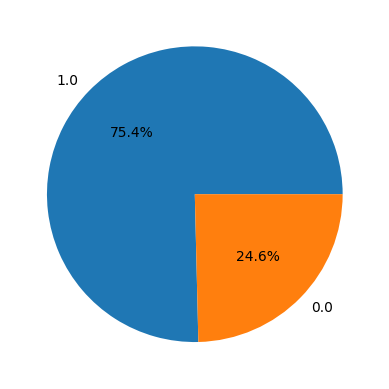

In [193]:
x = df['status'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()

#this code generates a pie chart to visually represent the distribution of values in the 'status' column of the DataFrame df.
# Each slice of the pie corresponds to a unique value in the 'status' column, and the size of each slice is proportional to the frequency (count) of that value in the column.
# The percentage labels on the pie chart indicate the proportion of each value relative to the total number of values in the 'status' column.


In [194]:
features = df.drop('status', axis=1)
target = df['status']

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=10)
X_train.shape, X_val.shape

#  this code prepares the data for a machine learning model by splitting the features and target variable into training and validation sets.

((156, 3), (39, 3))

In [195]:
# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
						random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape


((240, 3), (240,))

In [196]:
from sklearn.metrics import roc_auc_score as ras
models = [LogisticRegression(), XGBClassifier()]

for i in range(len(models)):
	models[i].fit(X, Y)

	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X)[:, 1]
	print('Training Accuracy : ', ras(Y, train_preds))

	val_preds = models[i].predict_proba(X_val)[:, 1]
	print('Validation Accuracy : ', ras(Y_val, val_preds))
	print()

# This code snippet is training two classification models, Logistic Regression and XGBoost,
# and then evaluating their performance on both the training and validation datasets using the ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score

LogisticRegression() : 
Training Accuracy :  0.9335416666666667
Validation Accuracy :  0.8240740740740741

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8858024691358025



In [197]:
print(metrics.classification_report
	(Y_val, models[0].predict(X_val)))


              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        12
         1.0       0.83      0.74      0.78        27

    accuracy                           0.72        39
   macro avg       0.68      0.70      0.69        39
weighted avg       0.74      0.72      0.73        39

